<a href="https://colab.research.google.com/github/johanesPao/tensorflow_developer_certificate/blob/main/10_time_series_forecasting_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series forecasting fundamentals with TensorFlow + Milestone Project 3: BitPredict

Let's write some tensorFlow code to predict the price of Bitcoin based on the historical price of Bitcoin.

⚠ **Note:** This is not financial advice.

Links:
* All resources: https://github.com/mrdbourke/tensorflow-deep-learning
* Book version of actual code/text: https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/

## Get data

We're going to be using the historical price data of Bitcoin to try and predict the future price of Bitcoin, we download the data from here: https://www.coindesk.com/price/bitcoin

In [248]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-07-14 06:02:21--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.2’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2022-07-14 06:02:22 (10.2 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.2’ saved [178509/178509]



## Importing time series with pandas

In [249]:
# Import with pandas
import pandas as pd
# Let's read in our Bitcoin data and parse the dates
df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                 parse_dates=['Date'],
                 index_col=['Date']) # parse the date column and tell pandas column 1 is a datetime
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [251]:
# How many samples do we have
len(df)

2787

We've collected the historical price of Bitcoin for the past ~8 years but there's 2787 samples.

Typically deep learning models usually like lots and lots and lots of samples (where lots and lots and lots can be a thousands to tens of thousands to millions).

A smaller number of samples is something you'll often run into with time series data problems.

> 🔑 **Note:** The **seasonality** of a time series dataset is referred as the number of samples per year. So for our Bitcoin data, it has a seasonality of daily or value of 365 because we collect one sample per day meaning we'll get 365 samples per year.

In [252]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={'Closing Price (USD)': 'Price'})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


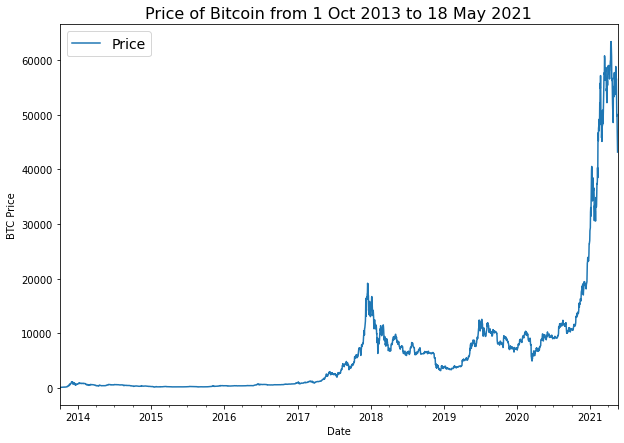

In [253]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel('BTC Price')
plt.title('Price of Bitcoin from 1 Oct 2013 to 18 May 2021', fontsize=16)
plt.legend(fontsize=14)

## Importing time series data with Python's CSV module

In [254]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
    csv_reader = csv.reader(f, delimiter=',')
    next(csv_reader) # skip first line (this gets rid of the column titles)
    for line in csv_reader:
        timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not string)
        btc_price.append(float(line[2])) # get closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'Date')

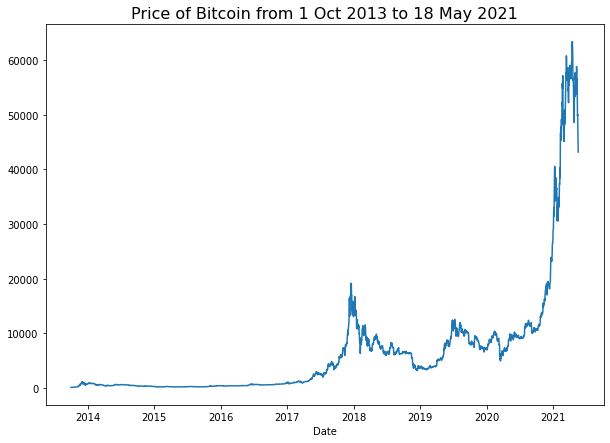

In [255]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title('Price of Bitcoin from 1 Oct 2013 to 18 May 2021', fontsize=16)
plt.xlabel('Date')

## Format data part 1: Create train and test sets of our time series data

### Creating train and test sets with time series data (the wrong way)

In [256]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [257]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # BTC prices
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

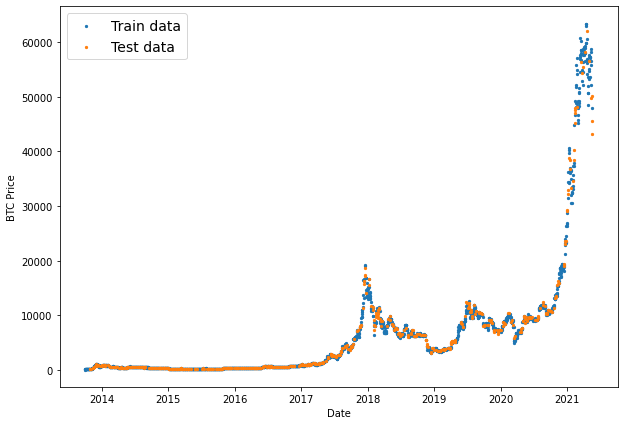

In [258]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend(fontsize=14)
plt.show()

### Create train & test sets for time series (the right way)

In [259]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test - you can change these values as needed, e.g. 90/10, 95/5

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

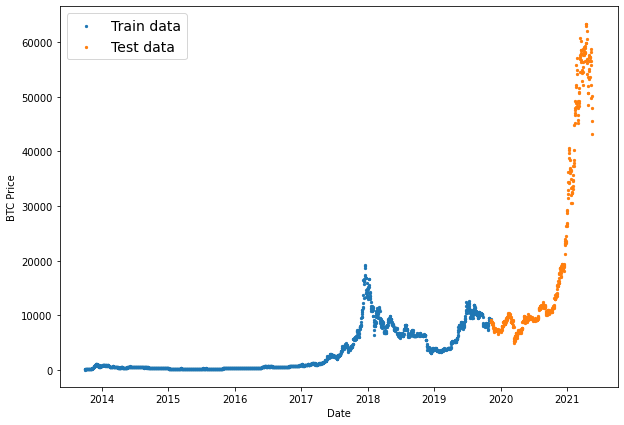

In [260]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend(fontsize=14)
plt.show()

## Create a plotting function

Typing plotting code is tedious, let's functionize it

In [261]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
    """
    Plots timesteps (a series of points in time) against values (a series of values across timesteps).

    Args:
        timesteps: array of timestep values
        values: array of values across time
        format: style of plot, default "."
        start: where to start the plot (setting a value will index from start of timesteps & values)
        end: where to end the plot (similar to start but for the end)
        label: label to show on plot about values, default None

    Return:
        plot
    """
    # Plot the series
    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    if label:
        plt.legend(fontsize=14) # make label bigger
    plt.grid(True)

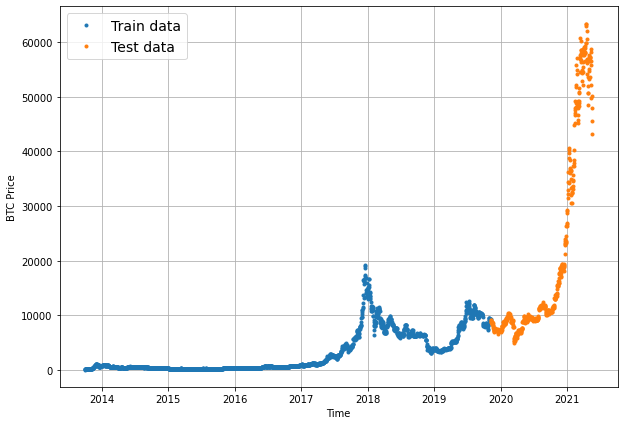

In [262]:
# Test out plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modelling Experiments

We've got some Bitcoin historical data, to model it, let's run a series of modelling experiments and see which model performs best.

Terms to be familiar with:
* **Horizon** = number of timesteps into the future we're going to predict
* **Window size** = number of timesteps we're going to use to predict **horizon**

Modelling experiments we're running:
* 0 Naive model (baseline)
* 1 Dense model, horizon = 1, window = 7
* 2 Same as 1, horizon = 1, window = 30
* 3 Same as 1, horizon = 7, window = 30
* 4 Conv1D
* 5 LSTM
* 6 Same as 1 (but with multivariate data)
* 7 N-BEATs Algorithm
* 8 Ensemble (multiple models optimized on different loss functions)
* 9 Future prediction model (model to predict future values)
* 10 Same as 1 (but with turkey data introduced)

## Model 0: Naive forecast (baseline)

The formula looks like this:

$\hat{y}_{t} = y_{t-1}$

In English:

> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1.

In [263]:
# Create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

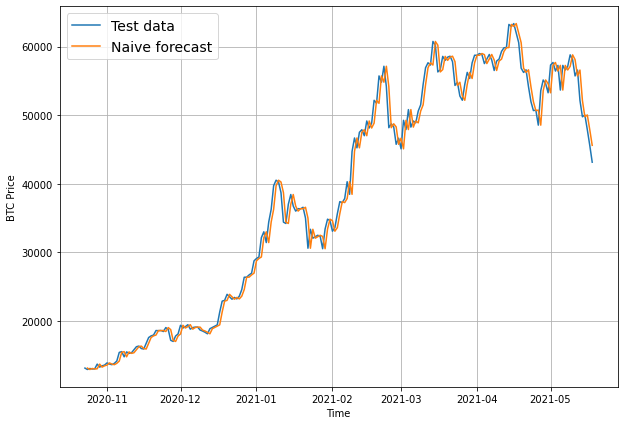

In [264]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=X_train, values=y_train, label='Train data')
plot_time_series(timesteps=X_test, values=y_test, start=350, format="-", label='Test data')
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=350, format="-", label="Naive forecast")

## Evaluating a time series model

Let's look into some evaluation metrics for time series forecasting.

What are we doing?

We're predicting a number, so that means we have a form of a regression problem.

Because we're working on a regression problem, we'll need some regression-like metrics.

A few common regression metrics (which can also be used for time series forecasting):
* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean squared error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error

For all of the above metrics, **lower is better**, for example, an MAE of 0 is better than an MAE of 100.

The main thing we're evaluating here is: **how do our model's forecasts (y_pred) compare against the actual values (y_true or ground truth values)?**

In [265]:
import tensorflow as tf

In [266]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
    """
    Implement MASE (assuming no seasonality of data).
    """
    mae = tf.reduce_mean(tf.abs(y_true-y_pred))

    # Find MAE of naive forecast (no seasonality)
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shift of 1)

    return mae / mae_naive_no_season

In [267]:
mean_absolute_scaled_error(y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [268]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
    # Make sure float32 datatype (for metric calculation)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate various evaluation metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    return {"mae": mae.numpy(),
            "mse": mse.numpy(),
            "rmse": rmse.numpy(),
            "mape": mape.numpy(),
            "mase": mase.numpy()}

That's one good looking evaluation function!

Let's now see if it works...

In [269]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

## Othe models you can use for baselines and for actual forecasts

In this notebook, we're focused on TensorFlow and deep learning models.

However there are plenty of other styles of time series forecasting models you may want to experiment with:
https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#other-kinds-of-time-series-forecasting-models-which-can-be-used-for-baselines-and-actual-forecasts

## Format Data Part 2: Windowing our dataset

Why do we window?

We window our time series dataset to turn our data into a supervised learning problem.

```
Windowing for one week
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

In [270]:
btc_price[:8]

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033]

In [271]:
# What we want to do with our Bitcoin data
print(f'We want to use: {btc_price[:7]} to predict this: {btc_price[7]}')

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [272]:
# Let's setup a global variables for window and horizon size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make the prediction

In [273]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
    """
    Creates labels for windowed dataset

    e.g. if horizon=1
    Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
    """
    return x[:, :-horizon], x[:, -horizon:]

In [274]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f'Window: {tf.squeeze(test_window.numpy())} -> Label: {tf.squeeze(test_label.numpy())}')

Window: [0 1 2 3 4 5 6] -> Label: 7


In [275]:
tf.expand_dims(tf.range(8), axis=0)

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

We've got a way to label our windowed data.

However, this only works on a small scale.

We need a way to do the above across our entire time series.

We could do this with Python for loops, however, for large time series, that'd be quite slow.

To speed things up, we'll leverage NumPy's array indexing - https://numpy.org/doc/1.21/reference/arrays.indexing.html.

Our function will:
1. Create a window step of specific window size (e.g. [0, 1, 2, 3, 4, 5, 6])
2. Use NumPy indexing to create a 2D array of multiple window steps, for example:
```
[[0, 1, 2, 3, 4, 5, 6],
[1, 2, 3, 4, 5, 6, 7],
[2, 3, 4, 5, 6, 7, 8]]
```
3. Uses the 2D array of multiple window steps (from 2.) to index on a target series (e.g. the historical price of Bitcoin)
4. Uses our `get_labelled_windows()` function we created above to turn the window steps into windows with a specified horizon

> 📖 **Resource:** The function we're about to create has been adapted from the following article: https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5

In [276]:
import numpy as np
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
    """
    Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
    """
    # 1. Create a window of specific window_size (add the horizon on the end for labelling later)
    window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

    # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
    window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # -(window_size+horizon-1) to prevent the window of getting out of index. create 2D array of windows of size window_size
    # print(f'Window indexes:\n {window_indexes, window_indexes.shape}')

    # 3. Index on the target array (a time series) with 2D array of multiple window steps
    windowed_array = x[window_indexes]
    # print(windowed_array)

    # 4. Get the labelled windows
    windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
    return windows, labels

In [277]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [278]:
# View the first 3 windows/labels
for i in range(3):
    print(f'Window: {full_windows[i]} -> Label: {full_labels[i]}')

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [279]:
# View the last 3 windows/labels
for i in range(3):
    print(f'Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}')

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


> 🔑 **Note:** There's a function which does similar to the above in tf.keras.utils, an extension could be to try and replicate what we've done using the premade function: https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array

## Turning windows into training and test sets

In [280]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
    """
    Splits matching pairs of windows and labels into train and test splits.
    """
    split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

In [281]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [282]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [283]:
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [284]:
# Check to see if train_labels are the same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Make a modelling checkpoint

Because our model's performance will fluctuate from experiment to experiment, we're going to write a model checkpoint so we can compare apples to apples.

More spcifically, we want to compare each of our model's best performances against the other model's best performances.

For example if our model performs the best on epoch 55 (but we're training for 100 epochs), we want to load and evaluate the model saved on epoch 55.

We can create a modelling checkpoint callback using the following:
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [285]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                              monitor="val_loss",
                                              verbosity=0, # only output a limited amount of text
                                              save_best_only=True)

## Model 1: Dense model (window = 7, horizon = 1)

Our first deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units and ReLU
* An output layer with linear activation (no activation)
* Adam optimizer and MAE loss function
* Batch size of 128 (previously we've used 32)
* 100 epochs

Why these values?

I picked them out of experimentation.

* **Hyperparameters** = values a machine learning practicioner (you!) can adjust themselves
* **Parameters** = values a model learns on its own

In [286]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear') # linear activation is the same as having no activation
], name="model_1_dense") # name our model so we can save it

# 2. Compile
model_1.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse'])

# 3. Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 6s - loss: 2111.0571 - mae: 2111.0571 - mse: 9255782.0000INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


18/18 [==============================] - 1s 37ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6528 - val_mae: 2279.6528 - val_mse: 12772731.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 348.8859 - mae: 348.8859 - mse: 600802.6250INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 27ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9993 - val_mae: 1005.9993 - val_mse: 3441833.2500
Epoch 3/100
17/18 [===========================>..] - ETA: 0s - loss: 190.2321 - mae: 190.2321 - mse: 172918.6562INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


18/18 [==============================] - 1s 29ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.6094 - val_loss: 923.2862 - val_mae: 923.2861 - val_mse: 2868220.7500
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 211.3724 - mae: 211.3724 - mse: 238018.8906INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


18/18 [==============================] - 1s 35ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5781 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.5000
Epoch 5/100
18/18 [==============================] - ETA: 0s - loss: 165.0894 - mae: 165.0894 - mse: 145490.7812INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


18/18 [==============================] - 1s 61ms/step - loss: 165.0894 - mae: 165.0894 - mse: 145490.7812 - val_loss: 895.2237 - val_mae: 895.2237 - val_mse: 2564574.5000
Epoch 6/100
11/18 [=================>............] - ETA: 0s - loss: 155.7485 - mae: 155.7485 - mse: 118215.6719INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


18/18 [==============================] - 2s 99ms/step - loss: 158.5210 - mae: 158.5210 - mse: 133817.7344 - val_loss: 855.1984 - val_mae: 855.1984 - val_mse: 2481873.2500
Epoch 7/100
 9/18 [==============>...............] - ETA: 0s - loss: 164.8275 - mae: 164.8275 - mse: 150596.2812INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


18/18 [==============================] - 1s 49ms/step - loss: 151.3566 - mae: 151.3566 - mse: 123446.9766 - val_loss: 840.9166 - val_mae: 840.9166 - val_mse: 2276451.5000
Epoch 8/100
15/18 [========================>.....] - ETA: 0s - loss: 143.4757 - mae: 143.4757 - mse: 115762.9922INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


18/18 [==============================] - 1s 47ms/step - loss: 145.2560 - mae: 145.2560 - mse: 117694.5000 - val_loss: 803.5956 - val_mae: 803.5956 - val_mse: 2140573.5000
Epoch 9/100
11/18 [=================>............] - ETA: 0s - loss: 144.3166 - mae: 144.3166 - mse: 108879.2500INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


18/18 [==============================] - 1s 59ms/step - loss: 144.3546 - mae: 144.3546 - mse: 115269.3047 - val_loss: 799.5454 - val_mae: 799.5454 - val_mse: 2049207.7500
Epoch 10/100
17/18 [===========================>..] - ETA: 0s - loss: 140.3382 - mae: 140.3382 - mse: 111963.5859INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


18/18 [==============================] - 1s 59ms/step - loss: 141.2943 - mae: 141.2943 - mse: 112394.5938 - val_loss: 763.5010 - val_mae: 763.5010 - val_mse: 1933140.7500
Epoch 11/100
18/18 [==============================] - 0s 10ms/step - loss: 135.6595 - mae: 135.6595 - mse: 104118.2344 - val_loss: 771.3356 - val_mae: 771.3356 - val_mse: 1885849.7500
Epoch 12/100
18/18 [==============================] - 0s 8ms/step - loss: 134.1700 - mae: 134.1700 - mse: 101780.8672 - val_loss: 782.8079 - val_mae: 782.8079 - val_mse: 1881727.1250
Epoch 13/100
18/18 [==============================] - 0s 10ms/step - loss: 134.6015 - mae: 134.6015 - mse: 102345.2266 - val_loss: 784.4449 - val_mae: 784.4449 - val_mse: 1860996.1250
Epoch 14/100
12/18 [===================>..........] - ETA: 0s - loss: 126.2412 - mae: 126.2412 - mse: 90989.1016INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


18/18 [==============================] - 1s 83ms/step - loss: 130.6127 - mae: 130.6127 - mse: 96225.1328 - val_loss: 751.3234 - val_mae: 751.3233 - val_mse: 1749609.0000
Epoch 15/100
12/18 [===================>..........] - ETA: 0s - loss: 122.8770 - mae: 122.8770 - mse: 85870.7109INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


18/18 [==============================] - 1s 45ms/step - loss: 128.8347 - mae: 128.8347 - mse: 94306.9922 - val_loss: 696.5756 - val_mae: 696.5756 - val_mse: 1606352.3750
Epoch 16/100
18/18 [==============================] - 0s 10ms/step - loss: 124.7739 - mae: 124.7739 - mse: 90394.9375 - val_loss: 702.4698 - val_mae: 702.4698 - val_mse: 1592416.2500
Epoch 17/100
18/18 [==============================] - 0s 10ms/step - loss: 123.4474 - mae: 123.4474 - mse: 89247.7031 - val_loss: 704.9239 - val_mae: 704.9239 - val_mse: 1580782.7500
Epoch 18/100
13/18 [====================>.........] - ETA: 0s - loss: 128.4065 - mae: 128.4065 - mse: 95061.4922INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


18/18 [==============================] - 1s 46ms/step - loss: 122.2105 - mae: 122.2105 - mse: 87607.5938 - val_loss: 667.9724 - val_mae: 667.9724 - val_mse: 1498881.8750
Epoch 19/100
18/18 [==============================] - 0s 14ms/step - loss: 121.7263 - mae: 121.7263 - mse: 86632.2422 - val_loss: 718.8796 - val_mae: 718.8796 - val_mse: 1589299.3750
Epoch 20/100
 9/18 [==============>...............] - ETA: 0s - loss: 121.8251 - mae: 121.8251 - mse: 83666.1875 INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


18/18 [==============================] - 1s 64ms/step - loss: 119.2420 - mae: 119.2420 - mse: 84334.3203 - val_loss: 657.0666 - val_mae: 657.0666 - val_mse: 1447501.1250
Epoch 21/100
13/18 [====================>.........] - ETA: 0s - loss: 119.8308 - mae: 119.8308 - mse: 78497.4219INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


18/18 [==============================] - 1s 71ms/step - loss: 121.2275 - mae: 121.2275 - mse: 85743.3828 - val_loss: 637.0333 - val_mae: 637.0333 - val_mse: 1401774.2500
Epoch 22/100
18/18 [==============================] - 0s 8ms/step - loss: 119.9544 - mae: 119.9544 - mse: 84050.1094 - val_loss: 671.2488 - val_mae: 671.2488 - val_mse: 1447895.7500
Epoch 23/100
10/18 [===============>..............] - ETA: 0s - loss: 121.0707 - mae: 121.0707 - mse: 72879.2031INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


18/18 [==============================] - 1s 72ms/step - loss: 121.9248 - mae: 121.9248 - mse: 83746.1250 - val_loss: 633.3592 - val_mae: 633.3592 - val_mse: 1367377.8750
Epoch 24/100
12/18 [===================>..........] - ETA: 0s - loss: 119.1843 - mae: 119.1843 - mse: 91346.6172INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


18/18 [==============================] - 1s 60ms/step - loss: 116.3665 - mae: 116.3665 - mse: 81446.6562 - val_loss: 624.4852 - val_mae: 624.4852 - val_mse: 1348960.6250
Epoch 25/100
14/18 [======================>.......] - ETA: 0s - loss: 116.2266 - mae: 116.2266 - mse: 78071.9922INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


18/18 [==============================] - 1s 49ms/step - loss: 114.6816 - mae: 114.6816 - mse: 78912.8359 - val_loss: 619.7570 - val_mae: 619.7570 - val_mse: 1351089.7500
Epoch 26/100
12/18 [===================>..........] - ETA: 0s - loss: 115.0316 - mae: 115.0316 - mse: 69628.1094INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


18/18 [==============================] - 1s 55ms/step - loss: 116.4455 - mae: 116.4455 - mse: 79365.5938 - val_loss: 615.6364 - val_mae: 615.6364 - val_mse: 1321514.3750
Epoch 27/100
18/18 [==============================] - 0s 11ms/step - loss: 116.5868 - mae: 116.5868 - mse: 78672.9062 - val_loss: 615.9629 - val_mae: 615.9629 - val_mse: 1313077.5000
Epoch 28/100
11/18 [=================>............] - ETA: 0s - loss: 117.1528 - mae: 117.1528 - mse: 80414.4141INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


18/18 [==============================] - 2s 94ms/step - loss: 113.4691 - mae: 113.4691 - mse: 77440.0938 - val_loss: 608.0921 - val_mae: 608.0921 - val_mse: 1309775.3750
Epoch 29/100
18/18 [==============================] - 0s 7ms/step - loss: 113.7598 - mae: 113.7598 - mse: 78506.9531 - val_loss: 621.9305 - val_mae: 621.9305 - val_mse: 1313324.6250
Epoch 30/100
14/18 [======================>.......] - ETA: 0s - loss: 117.3913 - mae: 117.3913 - mse: 77817.2500INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


18/18 [==============================] - 1s 65ms/step - loss: 116.8613 - mae: 116.8613 - mse: 79236.4609 - val_loss: 604.4056 - val_mae: 604.4056 - val_mse: 1283408.0000
Epoch 31/100
18/18 [==============================] - 0s 7ms/step - loss: 111.9375 - mae: 111.9375 - mse: 74849.0703 - val_loss: 609.3882 - val_mae: 609.3882 - val_mse: 1284506.2500
Epoch 32/100
14/18 [======================>.......] - ETA: 0s - loss: 115.2051 - mae: 115.2051 - mse: 80412.7734INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


18/18 [==============================] - 1s 58ms/step - loss: 112.4175 - mae: 112.4175 - mse: 77178.5859 - val_loss: 603.0588 - val_mae: 603.0588 - val_mse: 1273059.5000
Epoch 33/100
18/18 [==============================] - 0s 8ms/step - loss: 112.6697 - mae: 112.6697 - mse: 75787.9766 - val_loss: 645.6973 - val_mae: 645.6973 - val_mse: 1353255.7500
Epoch 34/100
18/18 [==============================] - 0s 12ms/step - loss: 111.9867 - mae: 111.9867 - mse: 77245.7266 - val_loss: 604.7634 - val_mae: 604.7634 - val_mse: 1289360.3750
Epoch 35/100
12/18 [===================>..........] - ETA: 0s - loss: 112.6920 - mae: 112.6920 - mse: 75658.5000INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


18/18 [==============================] - 1s 65ms/step - loss: 110.9451 - mae: 110.9451 - mse: 75301.7812 - val_loss: 593.4648 - val_mae: 593.4648 - val_mse: 1250491.3750
Epoch 36/100
18/18 [==============================] - 0s 7ms/step - loss: 114.4816 - mae: 114.4816 - mse: 76138.5391 - val_loss: 608.0074 - val_mae: 608.0074 - val_mse: 1269272.3750
Epoch 37/100
18/18 [==============================] - 0s 7ms/step - loss: 110.2016 - mae: 110.2016 - mse: 74635.3047 - val_loss: 597.2308 - val_mae: 597.2308 - val_mse: 1248474.0000
Epoch 38/100
18/18 [==============================] - 0s 10ms/step - loss: 112.2372 - mae: 112.2372 - mse: 75821.6953 - val_loss: 637.9798 - val_mae: 637.9798 - val_mse: 1366130.8750
Epoch 39/100
12/18 [===================>..........] - ETA: 0s - loss: 116.3627 - mae: 116.3627 - mse: 80992.7734 INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


18/18 [==============================] - 1s 48ms/step - loss: 115.1289 - mae: 115.1289 - mse: 76339.6797 - val_loss: 587.4680 - val_mae: 587.4680 - val_mse: 1233512.3750
Epoch 40/100
18/18 [==============================] - 0s 8ms/step - loss: 110.0854 - mae: 110.0854 - mse: 73528.4766 - val_loss: 592.7117 - val_mae: 592.7117 - val_mse: 1251474.6250
Epoch 41/100
18/18 [==============================] - 0s 8ms/step - loss: 110.6344 - mae: 110.6344 - mse: 73528.7891 - val_loss: 593.8997 - val_mae: 593.8997 - val_mse: 1253678.5000
Epoch 42/100
18/18 [==============================] - 0s 8ms/step - loss: 113.5762 - mae: 113.5762 - mse: 77076.7031 - val_loss: 636.3674 - val_mae: 636.3674 - val_mse: 1317283.5000
Epoch 43/100
18/18 [==============================] - 0s 11ms/step - loss: 116.2285 - mae: 116.2285 - mse: 74712.2031 - val_loss: 662.9263 - val_mae: 662.9263 - val_mse: 1419201.7500
Epoch 44/100
18/18 [==============================] - 0s 14ms/step - loss: 120.0192 - mae: 120.0192 -

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


18/18 [==============================] - 1s 73ms/step - loss: 112.4355 - mae: 112.4355 - mse: 73980.3359 - val_loss: 579.7042 - val_mae: 579.7042 - val_mse: 1208301.8750
Epoch 50/100
18/18 [==============================] - 0s 8ms/step - loss: 110.2108 - mae: 110.2108 - mse: 72939.7109 - val_loss: 639.2327 - val_mae: 639.2327 - val_mse: 1347994.1250
Epoch 51/100
18/18 [==============================] - 0s 9ms/step - loss: 111.0958 - mae: 111.0958 - mse: 73281.9062 - val_loss: 597.3571 - val_mae: 597.3571 - val_mse: 1229791.1250
Epoch 52/100
18/18 [==============================] - 0s 9ms/step - loss: 110.7351 - mae: 110.7351 - mse: 74529.6328 - val_loss: 580.7227 - val_mae: 580.7227 - val_mse: 1215477.1250
Epoch 53/100
18/18 [==============================] - 0s 10ms/step - loss: 111.1785 - mae: 111.1785 - mse: 74149.4766 - val_loss: 648.3586 - val_mae: 648.3586 - val_mse: 1336951.1250
Epoch 54/100
18/18 [==============================] - 0s 9ms/step - loss: 114.0831 - mae: 114.0831 - 

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


18/18 [==============================] - 1s 55ms/step - loss: 110.4910 - mae: 110.4910 - mse: 74711.2500 - val_loss: 579.5067 - val_mae: 579.5067 - val_mse: 1211580.3750
Epoch 56/100
18/18 [==============================] - 0s 10ms/step - loss: 108.0488 - mae: 108.0488 - mse: 71844.1562 - val_loss: 807.3853 - val_mae: 807.3853 - val_mse: 1859292.5000
Epoch 57/100
18/18 [==============================] - 0s 8ms/step - loss: 125.0614 - mae: 125.0614 - mse: 84025.2812 - val_loss: 674.1658 - val_mae: 674.1658 - val_mse: 1437686.8750
Epoch 58/100
18/18 [==============================] - 0s 9ms/step - loss: 115.4340 - mae: 115.4340 - mse: 73710.7422 - val_loss: 582.2697 - val_mae: 582.2697 - val_mse: 1202679.3750
Epoch 59/100
18/18 [==============================] - 0s 7ms/step - loss: 110.0881 - mae: 110.0881 - mse: 72845.1172 - val_loss: 606.7640 - val_mae: 606.7640 - val_mse: 1267544.0000
Epoch 60/100
18/18 [==============================] - 0s 10ms/step - loss: 108.7156 - mae: 108.7156 -

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


18/18 [==============================] - 1s 54ms/step - loss: 108.1525 - mae: 108.1525 - mse: 72252.1250 - val_loss: 573.9990 - val_mae: 573.9990 - val_mse: 1189583.5000
Epoch 62/100
18/18 [==============================] - 0s 13ms/step - loss: 107.3726 - mae: 107.3726 - mse: 70822.7891 - val_loss: 581.7015 - val_mae: 581.7015 - val_mse: 1214006.6250
Epoch 63/100
18/18 [==============================] - 0s 7ms/step - loss: 110.7667 - mae: 110.7667 - mse: 73178.4453 - val_loss: 637.5243 - val_mae: 637.5243 - val_mse: 1311201.6250
Epoch 64/100
18/18 [==============================] - 0s 9ms/step - loss: 110.1539 - mae: 110.1539 - mse: 72588.2188 - val_loss: 586.6598 - val_mae: 586.6598 - val_mse: 1207116.3750
Epoch 65/100
 9/18 [==============>...............] - ETA: 0s - loss: 108.3574 - mae: 108.3574 - mse: 71259.5156 INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


18/18 [==============================] - 1s 55ms/step - loss: 108.2325 - mae: 108.2325 - mse: 71962.0859 - val_loss: 573.5618 - val_mae: 573.5618 - val_mse: 1188986.2500
Epoch 66/100
10/18 [===============>..............] - ETA: 0s - loss: 103.6594 - mae: 103.6594 - mse: 56086.6367INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


18/18 [==============================] - 1s 48ms/step - loss: 108.6825 - mae: 108.6825 - mse: 71026.3516 - val_loss: 572.2206 - val_mae: 572.2206 - val_mse: 1187818.3750
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 106.6371 - mae: 106.6371 - mse: 70166.2578 - val_loss: 646.6359 - val_mae: 646.6359 - val_mse: 1356393.0000
Epoch 68/100
18/18 [==============================] - 0s 4ms/step - loss: 114.1603 - mae: 114.1603 - mse: 71297.3203 - val_loss: 681.8572 - val_mae: 681.8572 - val_mse: 1455430.5000
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 124.5514 - mae: 124.5514 - mse: 81238.9609 - val_loss: 655.9892 - val_mae: 655.9892 - val_mse: 1383324.6250
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 125.0234 - mae: 125.0234 - mse: 83058.2109 - val_loss: 601.0039 - val_mae: 601.0039 - val_mse: 1256963.6250
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 110.3652 - mae: 110.3652 - m

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 29ms/step - loss: 107.5879 - mae: 107.5879 - mse: 70333.8359 - val_loss: 571.9301 - val_mae: 571.9301 - val_mse: 1186830.0000
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 108.1598 - mae: 108.1598 - mse: 70200.0781 - val_loss: 575.2387 - val_mae: 575.2387 - val_mse: 1195318.0000
Epoch 79/100
18/18 [==============================] - 0s 4ms/step - loss: 107.9175 - mae: 107.9175 - mse: 72451.5859 - val_loss: 617.3083 - val_mae: 617.3083 - val_mse: 1285512.3750
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 108.9510 - mae: 108.9510 - mse: 72158.7812 - val_loss: 583.4841 - val_mae: 583.4841 - val_mse: 1194356.7500
Epoch 81/100
 1/18 [>.............................] - ETA: 0s - loss: 96.3487 - mae: 96.3487 - mse: 44505.5117INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 28ms/step - loss: 106.0505 - mae: 106.0505 - mse: 69690.9219 - val_loss: 570.0803 - val_mae: 570.0803 - val_mse: 1177237.8750
Epoch 82/100
18/18 [==============================] - 0s 4ms/step - loss: 115.6827 - mae: 115.6827 - mse: 76903.4922 - val_loss: 575.7388 - val_mae: 575.7388 - val_mse: 1194662.6250
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 110.9379 - mae: 110.9379 - mse: 72968.3047 - val_loss: 659.6579 - val_mae: 659.6579 - val_mse: 1388829.8750
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 111.4836 - mae: 111.4836 - mse: 73017.9453 - val_loss: 570.1957 - val_mae: 570.1957 - val_mse: 1177492.2500
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 107.5949 - mae: 107.5949 - mse: 70728.2266 - val_loss: 601.5939 - val_mae: 601.5939 - val_mse: 1228450.7500
Epoch 86/100
18/18 [==============================] - 0s 4ms/step - loss: 108.9425 - mae: 108.9425 - m

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 29ms/step - loss: 107.9217 - mae: 107.9217 - mse: 71668.0469 - val_loss: 569.0500 - val_mae: 569.0500 - val_mse: 1174588.3750
Epoch 89/100
 1/18 [>.............................] - ETA: 0s - loss: 101.8746 - mae: 101.8746 - mse: 57186.1758INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 28ms/step - loss: 106.0344 - mae: 106.0344 - mse: 68979.1484 - val_loss: 568.9510 - val_mae: 568.9510 - val_mse: 1171743.5000
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 105.4977 - mae: 105.4977 - mse: 67516.5000 - val_loss: 581.7677 - val_mae: 581.7677 - val_mse: 1190160.5000
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 108.8468 - mae: 108.8468 - mse: 71112.3281 - val_loss: 573.6025 - val_mae: 573.6025 - val_mse: 1185216.0000
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 110.8884 - mae: 110.8884 - mse: 73287.8125 - val_loss: 576.8243 - val_mae: 576.8243 - val_mse: 1181628.3750
Epoch 93/100
18/18 [==============================] - 0s 4ms/step - loss: 113.8781 - mae: 113.8781 - mse: 75236.4375 - val_loss: 608.3022 - val_mae: 608.3022 - val_mse: 1264206.1250
Epoch 94/100
18/18 [==============================] - 0s 4ms/step - loss: 110.5763 - mae: 110.5763 - m

In [287]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 585.9758 - mae: 585.9758 - mse: 1197802.1250


[585.9757690429688, 585.9757690429688, 1197802.125]

In [288]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 568.9510 - mae: 568.9510 - mse: 1171743.6250


[568.9510498046875, 568.9510498046875, 1171743.625]

## Making forecasts with a model (on the test dataset)

To make "forecasts" on the test dataset (note: these won't be actual forecasts, they're only pseudo forecasts because actual forecasts are into the future), let's write a function to:

1. Take in a train model
2. Takes in some input data (same kind of data the model was trained on)
3. Passes the input data to the model's `predict()` method
4. Returns the predictions

In [289]:
def make_preds(model, input_data):
    """
    Uses model to make predictions input_data
    """
    forecast = model.predict(input_data)
    return tf.squeeze(forecast) # return 1D array of predictions

In [290]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

(556, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8861.71 , 8769.887, 9015.711, 8795.519, 8723.811, 8730.111,
        8691.952, 8502.054, 8460.961, 8516.548], dtype=float32)>)

In [291]:
test_labels[:10]

array([[8798.04205463],
       [9081.18687849],
       [8711.53433917],
       [8760.89271814],
       [8749.52059102],
       [8656.97092235],
       [8500.64355816],
       [8469.2608989 ],
       [8537.33965197],
       [8205.80636599]])

In [292]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 568.9511,
 'mape': 2.5448983,
 'mase': 0.99948955,
 'mse': 1171743.8,
 'rmse': 1082.4711}

In [293]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

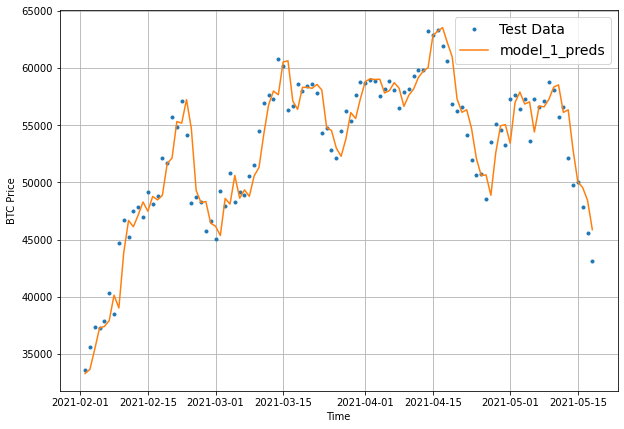

In [294]:
# Let's plot our model_1 predictions
offset = 450
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format="-",
                 label="model_1_preds")

## Model 2: Dense (window = 30, horizon = 1)

In [295]:
HORIZON = 1 # predict one step at a time (one day of Bitcoin prices)
WINDOW_SIZE = 30 # use 30 timesteps in past

In [296]:
# Make window data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [297]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [298]:
train_windows[:3], train_labels[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [299]:
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name="model_2_dense")

# Compile model
model_2.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


In [300]:
# Evaluate model_2 on test data
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 659.3332


659.3331909179688

In [301]:
# Load in the best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 605.8741


605.8740844726562

In [302]:
# Get the forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

In [303]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 605.8741,
 'mape': 2.726445,
 'mase': 1.0590738,
 'mse': 1273360.8,
 'rmse': 1128.4329}

In [304]:
model_1_results

{'mae': 568.9511,
 'mape': 2.5448983,
 'mase': 0.99948955,
 'mse': 1171743.8,
 'rmse': 1082.4711}

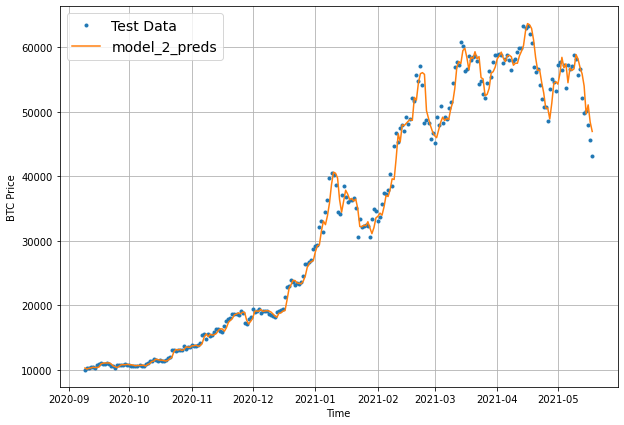

In [305]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for test_windows offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_2_preds,
                 start=offset,
                 format="-",
                 label="model_2_preds")

## Model 3: Dense (window = 30, horizon = 7)

In [306]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [307]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, 
                                                                                full_labels, 
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [308]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input and output sizes)
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name='model_3_dense')

# Compile model
model_3.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


In [309]:
# Evaluate model 3
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1300.1525


1300.1524658203125

In [310]:
# Load best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1237.5065


1237.5064697265625

In [311]:
# Make predictions with model_3
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9004.694 , 9048.1   , 9425.09  , 9258.256 , 9495.797 , 9558.453 ,
        9357.3545],
       [8735.506 , 8840.303 , 9247.793 , 8885.601 , 9097.186 , 9174.327 ,
        9156.818 ],
       [8672.508 , 8782.387 , 9123.857 , 8770.371 , 9007.13  , 9003.869 ,
        9042.725 ],
       [8874.399 , 8784.74  , 9043.902 , 8943.052 , 9033.477 , 9176.489 ,
        9039.677 ],
       [8825.891 , 8777.44  , 8926.78  , 8870.179 , 9213.232 , 9268.156 ,
        8942.487 ]], dtype=float32)>

In [312]:
# Evaluate model_3 results
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([ 513.6056  ,  355.08328 ,  327.17075 ,  358.5106  ,  420.53305 ,
         537.854   ,  545.66156 ,  485.9228  ,  584.49713 ,  687.3824  ,
         836.2264  ,  755.1577  ,  731.4958  ,  775.3399  ,  567.95544 ,
         266.80865 ,  188.80225 ,  188.10799 ,  253.095   ,  301.43256 ,
         151.10721 ,  196.81473 ,  191.46178 ,  231.65031 ,  143.61125 ,
         122.59089 ,  132.78879 ,  190.8118  ,  179.15994 ,  228.26018 ,
         314.44022 ,  379.09244 ,  278.32526 ,  295.3471  ,  299.3852  ,
         248.64983 ,  299.75662 ,  259.69434 ,  180.30531 ,  206.72922 ,
         374.62863 ,  144.85086 ,  142.33635 ,  131.11613 ,   93.941124,
          54.825542,   73.79541 ,  103.60128 ,  121.333916,  168.67278 ,
         183.90945 ,  152.25307 ,  186.57191 ,  146.91267 ,  240.42912 ,
         351.00662 ,  540.952   ,  549.1573  ,  521.2411  ,  526.8554  ,
         453.36237 ,  257.98117 ,  277.29486 ,  301.8247  ,  455.718   ,
         458.96017 ,  503.4438  ,  522.3119 

## Make our evaluation function work for larger horizons

In [313]:
tf.reduce_mean(model_3_results['mae']).numpy()

1237.5065

In [314]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
    # Make sure float32 datatype (for metric calculation)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate various evaluation metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    # Account for different sized metrics (for longer horizons, we want to reduce metrics to a single value)
    if mae.ndim > 0:
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)

    return {"mae": mae.numpy(),
            "mse": mse.numpy(),
            "rmse": rmse.numpy(),
            "mape": mape.numpy(),
            "mase": mase.numpy()}

In [315]:
# Get model 3 results aggregated to single value
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1237.5065,
 'mape': 5.558879,
 'mase': 2.2020733,
 'mse': 5405199.0,
 'rmse': 1425.7478}

In [316]:
model_1_results, model_2_results, naive_results

({'mae': 568.9511,
  'mape': 2.5448983,
  'mase': 0.99948955,
  'mse': 1171743.8,
  'rmse': 1082.4711},
 {'mae': 605.8741,
  'mape': 2.726445,
  'mase': 1.0590738,
  'mse': 1273360.8,
  'rmse': 1128.4329},
 {'mae': 567.9802,
  'mape': 2.516525,
  'mase': 0.99957,
  'mse': 1147547.0,
  'rmse': 1071.2362})

We've made and evaluated predictions with `model_3`, let's visualize, visualize, visualize!

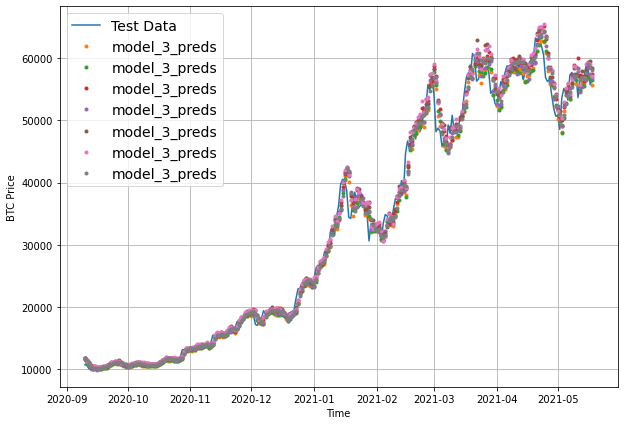

In [317]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset,
                 format="-",
                 label='Test Data')
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_3_preds,
                 start=offset,
                 label='model_3_preds')

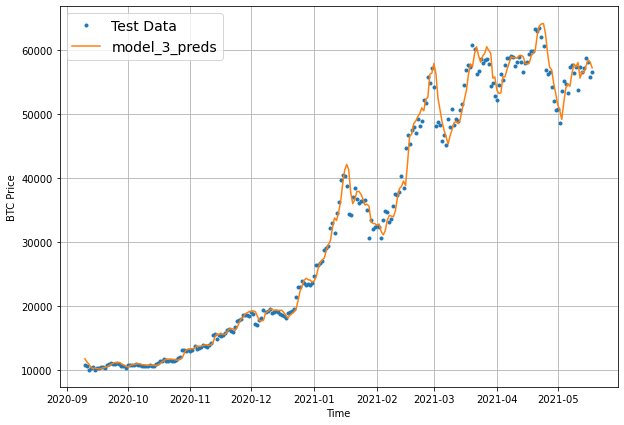

In [318]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset,
                 label='Test Data')
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 start=offset,
                 format="-",
                 label='model_3_preds')

## Which of our models is performing the best so far?

So we've trained a few models, now let's compare them and see how they've gone...

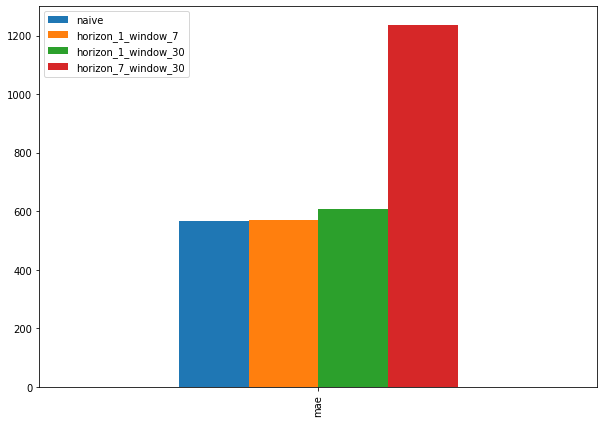

In [319]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar")

> 🔑 **Note:** You might be wondering, why are the naive results so good? One  of the reasons could be due to the presence of autocorrelation in the data. If a time series has autocorrelation it means the value at `t+1` (the next timestep) is typically close to the value at `t` (the current timestep). In other wordsm today's value is probably pretty close to yesterday's value. Of course, this isn't always the case but when it is (stock market prices often sem autocorrelated but often fluctuate randomly), a naive model will often get fairly good results.

> 📖 **Resource:** For more on how autocorrelation influences a model's predictions, see this article [How (not) to use Machine Learning for time series forecasting: Avoiding the pitfalls by Vegard Flovik](https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424)

## Model 4: Conv1D

In [320]:
HORIZON = 1 # predict next day of Bitcoin prices
WINDOW_SIZE = 7 # use previous week worth data

In [321]:
# Create windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [322]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

We need an input shape of: `(batch_size, timesteps, input_dims)`...

However our data isn't in that shape yet...

In [323]:
# Check data input shape
train_windows[0].shape # return (WINDOW_SIZE, )

(7,)

In [324]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [325]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for `input_dim`

In [326]:
# Test our our lambda layer
print(f'Original shape: {x.shape}') # (WINDOW_SIZE)
print(f'Expanded shape: {expand_dims_layer(x).shape}') # output = ...?
print(f'Original values with expanded shape:\n {expand_dims_layer(x)}')

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [327]:
x.numpy()

array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])

In [328]:
tf.random.set_seed(42)

# Create Conv1D model
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, strides=1, padding='causal', activation='relu'),
    layers.Dense(HORIZON)
], name="model_4_Conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


In [329]:
# Get a summary
model_4.summary()

Model: "model_4_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_7 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d_2 (Conv1D)           (None, 1, 128)            4608      
                                                                 
 dense_32 (Dense)            (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [330]:
model_2.summary()

Model: "model_2_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 128)               3968      
                                                                 
 dense_29 (Dense)            (None, 1)                 129       
                                                                 
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________


In [331]:
# Evaluate model 4
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 610.1541


610.154052734375

In [332]:
# Load the best performing model in model 4
model_4 = tf.keras.models.load_model("model_experiments/model_4_Conv1D/")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 570.8284


570.828369140625

In [333]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8851.464, 8754.47 , 8983.927, 8759.671, 8703.627, 8708.294,
       8661.667, 8494.839, 8435.316, 8492.114], dtype=float32)>

In [334]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 570.8284,
 'mape': 2.5593357,
 'mase': 1.0027875,
 'mse': 1176671.2,
 'rmse': 1084.7448}

## Model 5: RNN (LSTM)

Let's build an RNN model for our time series data.

We'll use the same data we created previously.

In [335]:
tf.random.set_seed(42)

# Let's build a LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation='relu')(x)
# x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_LSTM")

# Compile
model_5.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
10/18 [===============>..............] - ETA: 0s - loss: 2581.3218 INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 120ms/step - loss: 2323.6082 - val_loss: 9222.6523
Epoch 2/100
10/18 [===============>..............] - ETA: 0s - loss: 989.3721 INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 110ms/step - loss: 695.4739 - val_loss: 1486.0555
Epoch 3/100
11/18 [=================>............] - ETA: 0s - loss: 270.4985INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 134ms/step - loss: 237.3967 - val_loss: 1298.9084
Epoch 4/100
11/18 [=================>............] - ETA: 0s - loss: 196.5330INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 107ms/step - loss: 181.9180 - val_loss: 966.6431
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 173.4022 - val_loss: 970.9295
Epoch 6/100
11/18 [=================>............] - ETA: 0s - loss: 169.3568INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 106ms/step - loss: 173.5414 - val_loss: 941.4746
Epoch 7/100
 9/18 [==============>...............] - ETA: 0s - loss: 187.0711INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 105ms/step - loss: 170.3566 - val_loss: 898.5215
Epoch 8/100
18/18 [==============================] - 0s 8ms/step - loss: 157.6712 - val_loss: 914.8642
Epoch 9/100
18/18 [==============================] - 0s 8ms/step - loss: 166.5143 - val_loss: 1079.0776
Epoch 10/100
11/18 [=================>............] - ETA: 0s - loss: 162.8947INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 105ms/step - loss: 162.3369 - val_loss: 877.1690
Epoch 11/100
18/18 [==============================] - 0s 7ms/step - loss: 163.0841 - val_loss: 924.1126
Epoch 12/100
18/18 [==============================] - 0s 7ms/step - loss: 168.5598 - val_loss: 941.6025
Epoch 13/100
18/18 [==============================] - 0s 8ms/step - loss: 166.4726 - val_loss: 934.8436
Epoch 14/100
18/18 [==============================] - 0s 7ms/step - loss: 163.9537 - val_loss: 920.2160
Epoch 15/100
10/18 [===============>..............] - ETA: 0s - loss: 155.2971INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 138ms/step - loss: 152.9470 - val_loss: 856.2653
Epoch 16/100
18/18 [==============================] - 0s 7ms/step - loss: 147.4420 - val_loss: 898.9914
Epoch 17/100
18/18 [==============================] - 0s 8ms/step - loss: 151.0533 - val_loss: 943.1418
Epoch 18/100
18/18 [==============================] - 0s 7ms/step - loss: 157.8232 - val_loss: 924.0046
Epoch 19/100
18/18 [==============================] - 0s 8ms/step - loss: 155.9198 - val_loss: 911.4753
Epoch 20/100
18/18 [==============================] - 0s 7ms/step - loss: 155.6456 - val_loss: 862.6680
Epoch 21/100
18/18 [==============================] - 0s 8ms/step - loss: 153.1514 - val_loss: 862.5831
Epoch 22/100
18/18 [==============================] - 0s 7ms/step - loss: 151.4883 - val_loss: 863.8172
Epoch 23/100
18/18 [==============================] - 0s 7ms/step - loss: 150.7770 - val_loss: 886.8356
Epoch 24/100
18/18 [==============================] - 0s 7ms/step - loss: 1

INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 109ms/step - loss: 146.8467 - val_loss: 845.2782
Epoch 26/100
11/18 [=================>............] - ETA: 0s - loss: 145.1898INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 109ms/step - loss: 145.9843 - val_loss: 818.6807
Epoch 27/100
11/18 [=================>............] - ETA: 0s - loss: 153.2509INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 107ms/step - loss: 144.4289 - val_loss: 804.3279
Epoch 28/100
11/18 [=================>............] - ETA: 0s - loss: 145.3607INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 108ms/step - loss: 142.4610 - val_loss: 789.0859
Epoch 29/100
18/18 [==============================] - 0s 7ms/step - loss: 141.8739 - val_loss: 806.6758
Epoch 30/100
18/18 [==============================] - 0s 7ms/step - loss: 142.0521 - val_loss: 794.8836
Epoch 31/100
11/18 [=================>............] - ETA: 0s - loss: 138.5929INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 106ms/step - loss: 138.4690 - val_loss: 773.2812
Epoch 32/100
10/18 [===============>..............] - ETA: 0s - loss: 140.1913INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 141ms/step - loss: 137.1986 - val_loss: 772.2625
Epoch 33/100
18/18 [==============================] - 0s 7ms/step - loss: 135.9342 - val_loss: 786.4805
Epoch 34/100
10/18 [===============>..............] - ETA: 0s - loss: 138.4026INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 106ms/step - loss: 136.1931 - val_loss: 744.4506
Epoch 35/100
18/18 [==============================] - 0s 7ms/step - loss: 133.4513 - val_loss: 756.2970
Epoch 36/100
11/18 [=================>............] - ETA: 0s - loss: 134.1216INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 109ms/step - loss: 134.0992 - val_loss: 735.1729
Epoch 37/100
18/18 [==============================] - 0s 7ms/step - loss: 130.6932 - val_loss: 745.9099
Epoch 38/100
10/18 [===============>..............] - ETA: 0s - loss: 137.2887INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 108ms/step - loss: 129.2891 - val_loss: 717.2498
Epoch 39/100
18/18 [==============================] - 0s 8ms/step - loss: 129.6088 - val_loss: 719.0665
Epoch 40/100
18/18 [==============================] - 0s 7ms/step - loss: 129.6111 - val_loss: 732.0632
Epoch 41/100
10/18 [===============>..............] - ETA: 0s - loss: 133.3553INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 107ms/step - loss: 127.1393 - val_loss: 702.9354
Epoch 42/100
11/18 [=================>............] - ETA: 0s - loss: 126.7599INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 106ms/step - loss: 125.6113 - val_loss: 700.8702
Epoch 43/100
18/18 [==============================] - 0s 7ms/step - loss: 125.9959 - val_loss: 704.3682
Epoch 44/100
10/18 [===============>..............] - ETA: 0s - loss: 119.9876INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 142ms/step - loss: 125.2241 - val_loss: 698.7766
Epoch 45/100
11/18 [=================>............] - ETA: 0s - loss: 121.2221INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 109ms/step - loss: 122.5007 - val_loss: 683.0590
Epoch 46/100
11/18 [=================>............] - ETA: 0s - loss: 130.6197INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 109ms/step - loss: 124.4726 - val_loss: 679.1873
Epoch 47/100
18/18 [==============================] - 0s 7ms/step - loss: 122.1862 - val_loss: 705.4241
Epoch 48/100
11/18 [=================>............] - ETA: 0s - loss: 120.7927INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 107ms/step - loss: 122.0458 - val_loss: 677.0784
Epoch 49/100
11/18 [=================>............] - ETA: 0s - loss: 127.1128INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 106ms/step - loss: 121.1548 - val_loss: 674.6848
Epoch 50/100
18/18 [==============================] - 0s 7ms/step - loss: 122.8890 - val_loss: 691.4816
Epoch 51/100
18/18 [==============================] - 0s 8ms/step - loss: 122.2994 - val_loss: 737.3929
Epoch 52/100
11/18 [=================>............] - ETA: 0s - loss: 128.5450INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 108ms/step - loss: 121.2944 - val_loss: 657.2365
Epoch 53/100
10/18 [===============>..............] - ETA: 0s - loss: 114.9636INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 140ms/step - loss: 119.7668 - val_loss: 652.7970
Epoch 54/100
18/18 [==============================] - 0s 8ms/step - loss: 120.1222 - val_loss: 654.4439
Epoch 55/100
11/18 [=================>............] - ETA: 0s - loss: 127.3472INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 108ms/step - loss: 119.2566 - val_loss: 647.2831
Epoch 56/100
11/18 [=================>............] - ETA: 0s - loss: 122.4764INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 105ms/step - loss: 120.0544 - val_loss: 643.7808
Epoch 57/100
18/18 [==============================] - 0s 7ms/step - loss: 123.1243 - val_loss: 671.1797
Epoch 58/100
11/18 [=================>............] - ETA: 0s - loss: 120.3613INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 105ms/step - loss: 118.4059 - val_loss: 640.2656
Epoch 59/100
18/18 [==============================] - 0s 7ms/step - loss: 117.7119 - val_loss: 645.3837
Epoch 60/100
11/18 [=================>............] - ETA: 0s - loss: 119.2167INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 106ms/step - loss: 118.5346 - val_loss: 638.7429
Epoch 61/100
18/18 [==============================] - 0s 7ms/step - loss: 118.3129 - val_loss: 689.4144
Epoch 62/100
18/18 [==============================] - 0s 7ms/step - loss: 121.4350 - val_loss: 748.5565
Epoch 63/100
18/18 [==============================] - 0s 7ms/step - loss: 123.1006 - val_loss: 651.8298
Epoch 64/100
18/18 [==============================] - 0s 7ms/step - loss: 115.9679 - val_loss: 672.9166
Epoch 65/100
10/18 [===============>..............] - ETA: 0s - loss: 119.5127INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 139ms/step - loss: 118.8341 - val_loss: 631.7538
Epoch 66/100
18/18 [==============================] - 0s 8ms/step - loss: 116.2212 - val_loss: 634.5445
Epoch 67/100
11/18 [=================>............] - ETA: 0s - loss: 116.1731INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 105ms/step - loss: 116.1580 - val_loss: 623.8932
Epoch 68/100
18/18 [==============================] - 0s 8ms/step - loss: 115.5543 - val_loss: 635.4929
Epoch 69/100
18/18 [==============================] - 0s 7ms/step - loss: 120.5866 - val_loss: 626.3387
Epoch 70/100
10/18 [===============>..............] - ETA: 0s - loss: 115.4515INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 107ms/step - loss: 114.9188 - val_loss: 619.3181
Epoch 71/100
18/18 [==============================] - 0s 7ms/step - loss: 114.8998 - val_loss: 650.9373
Epoch 72/100
18/18 [==============================] - 0s 7ms/step - loss: 118.2033 - val_loss: 630.5287
Epoch 73/100
18/18 [==============================] - 0s 8ms/step - loss: 115.3612 - val_loss: 623.0369
Epoch 74/100
18/18 [==============================] - 0s 7ms/step - loss: 115.0345 - val_loss: 623.0776
Epoch 75/100
18/18 [==============================] - 0s 8ms/step - loss: 115.2057 - val_loss: 640.5281
Epoch 76/100
11/18 [=================>............] - ETA: 0s - loss: 114.5117INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 107ms/step - loss: 114.1402 - val_loss: 614.4062
Epoch 77/100
18/18 [==============================] - 0s 7ms/step - loss: 115.5973 - val_loss: 689.8776
Epoch 78/100
18/18 [==============================] - 0s 7ms/step - loss: 117.2611 - val_loss: 645.2790
Epoch 79/100
11/18 [=================>............] - ETA: 0s - loss: 110.4640INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 105ms/step - loss: 114.1995 - val_loss: 608.7159
Epoch 80/100
18/18 [==============================] - 0s 7ms/step - loss: 112.7125 - val_loss: 614.9222
Epoch 81/100
18/18 [==============================] - 0s 7ms/step - loss: 113.3684 - val_loss: 634.8466
Epoch 82/100
11/18 [=================>............] - ETA: 0s - loss: 122.9989INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 107ms/step - loss: 115.9701 - val_loss: 607.8510
Epoch 83/100
18/18 [==============================] - 0s 8ms/step - loss: 113.3599 - val_loss: 628.8181
Epoch 84/100
18/18 [==============================] - 0s 8ms/step - loss: 114.4113 - val_loss: 628.5579
Epoch 85/100
18/18 [==============================] - 0s 8ms/step - loss: 114.8363 - val_loss: 634.7715
Epoch 86/100
18/18 [==============================] - 0s 7ms/step - loss: 115.5462 - val_loss: 613.5223
Epoch 87/100
11/18 [=================>............] - ETA: 0s - loss: 116.9523INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 139ms/step - loss: 112.5059 - val_loss: 604.7603
Epoch 88/100
10/18 [===============>..............] - ETA: 0s - loss: 118.3664INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 107ms/step - loss: 111.7706 - val_loss: 601.5748
Epoch 89/100
18/18 [==============================] - 0s 7ms/step - loss: 111.8470 - val_loss: 624.0131
Epoch 90/100
18/18 [==============================] - 0s 7ms/step - loss: 115.6354 - val_loss: 662.9452
Epoch 91/100
18/18 [==============================] - 0s 7ms/step - loss: 116.1836 - val_loss: 636.0310
Epoch 92/100
18/18 [==============================] - 0s 7ms/step - loss: 113.1700 - val_loss: 606.0366
Epoch 93/100
10/18 [===============>..............] - ETA: 0s - loss: 111.9717INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 108ms/step - loss: 112.4748 - val_loss: 599.8319
Epoch 94/100
18/18 [==============================] - 0s 7ms/step - loss: 111.2637 - val_loss: 601.3256
Epoch 95/100
11/18 [=================>............] - ETA: 0s - loss: 106.7242INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 107ms/step - loss: 111.0185 - val_loss: 597.1485
Epoch 96/100
18/18 [==============================] - 0s 8ms/step - loss: 112.3787 - val_loss: 601.1596
Epoch 97/100
18/18 [==============================] - 0s 7ms/step - loss: 111.4700 - val_loss: 626.1573
Epoch 98/100
18/18 [==============================] - 0s 8ms/step - loss: 111.7326 - val_loss: 601.0142
Epoch 99/100
18/18 [==============================] - ETA: 0s - loss: 110.7480INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 108ms/step - loss: 110.7480 - val_loss: 594.6030
Epoch 100/100
18/18 [==============================] - 0s 7ms/step - loss: 111.9943 - val_loss: 595.9847


In [336]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 594.6030


594.6029663085938

In [337]:
# Make prediction with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8978.46 , 8810.951, 8997.779, 8836.308, 8731.047], dtype=float32)>

In [338]:
# Evaluate model_5 predictions
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 594.60297,
 'mape': 2.6717565,
 'mase': 1.0445527,
 'mse': 1267231.9,
 'rmse': 1125.7139}

In [339]:
model_1_results

{'mae': 568.9511,
 'mape': 2.5448983,
 'mase': 0.99948955,
 'mse': 1171743.8,
 'rmse': 1082.4711}

> 🔑 **Note:** Because neural networks are such powerful algorithms, they can be used for almost any problem, however, that doesn't mean they'll achieve performant or usable results. You're probably starting to clue onto this now.

## Make a multivariate time series dataset

Before we add a feature to our time series, what is a feature we can use?

One feature we could add is whether or not Daniel Bourke tweeted on that day...

* day 1 - 0
* day 2 - 1
* day 3 - 0

What's a better feature to use?

How about the bitcoin halving events?

https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving

In [340]:
# Let's make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [341]:
# Let's add the bitcoin halving events to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward isn't in our dataset (our data start from 01 October 2013)
block_reward_2 = 25 # 8 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [342]:
# Create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[1]).days
block_reward_2_days, block_reward_3_days

(1012, 2420)

In [343]:
# Add in a block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block['block_reward'] = None

# Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [344]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [345]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


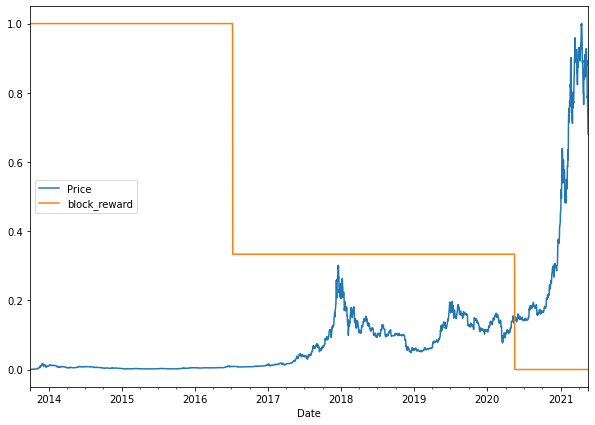

In [346]:
# Plot the block_reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[['Price', 'block_reward']]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7))

## Making a windowed dataset with pandas

Previously, we've turned our univariate time series into windowed dataset using the helper functions above.

However, since we've got multivariate data, these functions won't work.

Not to worry, we can use the pandas.DataFrame.shift() method to window our multivariate data.

In [347]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [348]:
# Make a copy of the bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # shift values for each step in WINDOW_SIZE
    bitcoin_prices_windowed[f'Price+{i+1}'] = bitcoin_prices_windowed['Price'].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


What we've done is created a way to window our dataset directly from a pandas dataframe.

```
[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]
```

In [349]:
# Create X (windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [350]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [351]:
# Make train and test sets using indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

## Model 6: Dense (multivariate time series)

In [352]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name='model_6_dense_multivariate')

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 5s - loss: 2853.4023INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 64ms/step - loss: 1234.6804 - val_loss: 2061.9041
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 337.7052INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 28ms/step - loss: 351.5053 - val_loss: 1908.6760
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 249.1732INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 235.4153 - val_loss: 1329.0612
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 271.0341INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 28ms/step - loss: 208.6112 - val_loss: 1102.1371
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 196.5770 - val_loss: 1107.8501
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 145.3367INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 187.2245 - val_loss: 1036.1742
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 231.5105INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 182.0245 - val_loss: 1019.2947
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 151.5176INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 175.7059 - val_loss: 977.8505
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 142.1689INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 170.1784 - val_loss: 954.4052
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 177.8448INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 164.4430 - val_loss: 913.5160
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 171.3627INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 29ms/step - loss: 158.6892 - val_loss: 874.2516
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 147.0429INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 152.0732 - val_loss: 861.0425
Epoch 13/100
18/18 [==============================] - 0s 4ms/step - loss: 151.1057 - val_loss: 886.1212
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 152.2400INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 147.5482 - val_loss: 837.8619
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 146.6370INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 142.3497 - val_loss: 794.4790
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 125.8471INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 137.5206 - val_loss: 778.4053
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 125.1490INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 135.8190 - val_loss: 772.4535
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 145.6097INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 134.8562 - val_loss: 747.4805
Epoch 19/100
18/18 [==============================] - 0s 4ms/step - loss: 130.3347 - val_loss: 761.0555
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 145.2515INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 128.6775 - val_loss: 701.8981
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 158.9073INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 28ms/step - loss: 129.5576 - val_loss: 691.0131
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 176.6308INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 125.8060 - val_loss: 684.4123
Epoch 23/100
18/18 [==============================] - 0s 4ms/step - loss: 125.5263 - val_loss: 692.1301
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 134.1221INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 122.4765 - val_loss: 674.2218
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 133.5674INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 121.1171 - val_loss: 669.6438
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 127.2623 - val_loss: 690.0402
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 180.3230INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 124.6204 - val_loss: 643.9724
Epoch 28/100
18/18 [==============================] - 0s 4ms/step - loss: 118.2544 - val_loss: 656.2767
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 109.8149INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 119.6374 - val_loss: 633.4547
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 130.2605INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 119.5001 - val_loss: 625.3952
Epoch 31/100
18/18 [==============================] - 0s 4ms/step - loss: 114.5633 - val_loss: 668.5065
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 121.3793INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 29ms/step - loss: 116.9750 - val_loss: 617.1062
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 115.2438 - val_loss: 649.0990
Epoch 34/100
18/18 [==============================] - 0s 4ms/step - loss: 114.5187 - val_loss: 632.1373
Epoch 35/100
16/18 [=========================>....] - ETA: 0s - loss: 113.8353INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 113.6357 - val_loss: 607.4172
Epoch 36/100
18/18 [==============================] - 0s 4ms/step - loss: 115.2605 - val_loss: 626.4321
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 141.7286INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 113.7020 - val_loss: 606.2318
Epoch 38/100
18/18 [==============================] - ETA: 0s - loss: 111.4061INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 111.4061 - val_loss: 603.2919
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 127.4214INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 112.7722 - val_loss: 596.0060
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 100.2578INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 110.5418 - val_loss: 593.2169
Epoch 41/100
18/18 [==============================] - 0s 4ms/step - loss: 110.8671 - val_loss: 609.1062
Epoch 42/100
18/18 [==============================] - 0s 4ms/step - loss: 115.7249 - val_loss: 607.4875
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 111.3313 - val_loss: 606.2029
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 65.3244INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 109.7027 - val_loss: 586.1214
Epoch 45/100
18/18 [==============================] - 0s 4ms/step - loss: 107.8748 - val_loss: 593.8446
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 109.8641 - val_loss: 586.4583
Epoch 47/100
18/18 [==============================] - 0s 4ms/step - loss: 112.3587 - val_loss: 655.4489
Epoch 48/100
18/18 [==============================] - 0s 4ms/step - loss: 109.1614 - val_loss: 598.7234
Epoch 49/100
18/18 [==============================] - 0s 4ms/step - loss: 109.3029 - val_loss: 589.2488
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 111.1971 - val_loss: 649.3787
Epoch 51/100
18/18 [==============================] - 0s 4ms/step - loss: 110.8514 - val_loss: 602.7667
Epoch 52/100
18/18 [==============================] - 0s 4ms/step - loss: 111.8331 - val_loss: 599.2957
Epoch 53/100
18/18 [==============================] - 0s 4ms/step - loss: 11

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 110.4068 - val_loss: 575.7753
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6609 - val_loss: 785.9750
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 124.9823 - val_loss: 670.3782
Epoch 58/100
18/18 [==============================] - 0s 4ms/step - loss: 112.8591 - val_loss: 580.2877
Epoch 59/100
18/18 [==============================] - 0s 4ms/step - loss: 107.2513 - val_loss: 597.5084
Epoch 60/100
18/18 [==============================] - 0s 4ms/step - loss: 109.2322 - val_loss: 632.2957
Epoch 61/100
18/18 [==============================] - 0s 4ms/step - loss: 109.3519 - val_loss: 591.5411
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 108.4084 - val_loss: 617.5800
Epoch 63/100
18/18 [==============================] - 0s 4ms/step - loss: 113.5326 - val_loss: 613.1477
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 11

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 112.0475 - val_loss: 575.5541
Epoch 66/100
18/18 [==============================] - 0s 4ms/step - loss: 111.2830 - val_loss: 590.7802
Epoch 67/100
18/18 [==============================] - 0s 4ms/step - loss: 106.7918 - val_loss: 586.8839
Epoch 68/100
18/18 [==============================] - 0s 4ms/step - loss: 112.2987 - val_loss: 696.5289
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 124.7808 - val_loss: 698.5264
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 119.3443 - val_loss: 581.2102
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 109.9960 - val_loss: 607.6740
Epoch 72/100
 1/18 [>.............................] - ETA: 0s - loss: 106.7779INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 54ms/step - loss: 106.7711 - val_loss: 573.6142
Epoch 73/100
18/18 [==============================] - 0s 4ms/step - loss: 110.2485 - val_loss: 618.8949
Epoch 74/100
18/18 [==============================] - 0s 4ms/step - loss: 105.5330 - val_loss: 574.9455
Epoch 75/100
18/18 [==============================] - 0s 4ms/step - loss: 107.3177 - val_loss: 606.1977
Epoch 76/100
18/18 [==============================] - 0s 4ms/step - loss: 107.8084 - val_loss: 582.2404
Epoch 77/100
 1/18 [>.............................] - ETA: 0s - loss: 83.6437INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 107.2528 - val_loss: 571.8563
Epoch 78/100
18/18 [==============================] - 0s 4ms/step - loss: 106.2309 - val_loss: 572.2830
Epoch 79/100
18/18 [==============================] - 0s 4ms/step - loss: 105.8568 - val_loss: 596.5463
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 107.8418 - val_loss: 577.2402
Epoch 81/100
 1/18 [>.............................] - ETA: 0s - loss: 95.0620INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 27ms/step - loss: 105.1101 - val_loss: 568.4899
Epoch 82/100
18/18 [==============================] - 0s 4ms/step - loss: 114.1867 - val_loss: 592.5610
Epoch 83/100
18/18 [==============================] - 0s 4ms/step - loss: 107.9631 - val_loss: 651.6215
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 109.6690 - val_loss: 568.9341
Epoch 85/100
18/18 [==============================] - 0s 4ms/step - loss: 105.8219 - val_loss: 571.5336
Epoch 86/100
18/18 [==============================] - 0s 4ms/step - loss: 104.8628 - val_loss: 579.3859
Epoch 87/100
18/18 [==============================] - 0s 4ms/step - loss: 104.7148 - val_loss: 582.9180
Epoch 88/100
18/18 [==============================] - 0s 4ms/step - loss: 106.8899 - val_loss: 569.0823
Epoch 89/100
18/18 [==============================] - 0s 4ms/step - loss: 105.4376 - val_loss: 569.3441
Epoch 90/100
18/18 [==============================] - 0s 4ms/step - loss: 10

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 28ms/step - loss: 107.7017 - val_loss: 567.8900
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 107.9951 - val_loss: 626.7440


In [353]:
# Evaluate multivariate model
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 626.7440


626.7439575195312

In [354]:
# Load in and evaluate best performing model
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 567.8900


567.8900146484375

In [355]:
# Make predictions with multivariate model
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8844.684, 8769.905, 9045.17 , 8747.686, 8728.429, 8772.757,
       8667.292, 8503.437, 8470.313, 8527.244], dtype=float32)>

In [356]:
# Evaluate predictions to get eval metrics
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 567.88995,
 'mape': 2.5460768,
 'mase': 0.99762535,
 'mse': 1164816.4,
 'rmse': 1079.2666}

In [357]:
model_1_results

{'mae': 568.9511,
 'mape': 2.5448983,
 'mase': 0.99948955,
 'mse': 1171743.8,
 'rmse': 1082.4711}

In [358]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

## Model 7: N-BEATS algorithm

Let's now try build the biggest baddest (though maube not the baddest, as inm it perform really well...) time series forecasting model we've built so far.

More specifically, we're going to be replicating the algorithm in Figure 1 from the following paper: https://arxiv.org/pdf/1905.10437.pdf

Why?

* This will allow us to practive replicating a paper with TensorFlow code
* We will see how to use TensorFlow layer subclassing (to make our own custom layers)
* Get experience using the Functional API to create a custom architecture
* Potentially get state of the art results on our problem

## Building and testing the N-BEATS block layer

Because the N-BEATS block layer doesn't exist in TensorFlow, we've got to create it.

To create custom layers and models inn TensorFlow we can use subclassing:

https://www.tensorflow.org/guide/keras/custom_layers_and_models

In [359]:
# Create NBeatBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self, # the constructor takes all the hyperparameters for the layer
                 input_size: int,
                 theta_size: int,
                 horizon: int,
                 n_neurons: int,
                 n_layers: int,
                 **kwargs): # the **kwargs argument takes care of all the arguments for the parent class (input_shape, trainable, name)
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers

        # Block contains stack of 4 fully connected layers each has ReLU activation
        self.hidden = [tf.keras.layers.Dense(n_neurons, activation='relu') for _ in range(n_layers)]
        # Output of block is a theta layer with linear activation
        self.theta_layer = tf.keras.layers.Dense(theta_size, activation='linear', name='theta')

    def call(self, inputs): # the call method is what runs when the layer is called
        x = inputs
        for layer in self.hidden: # pass inputs through each hidden layer
            x = layer(x)
        theta = self.theta_layer(x)
        # Output the backcast and the forecast from theta
        backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
        return backcast, forecast

Let's test our NBeatBlock class.

To do we'll make some dummy inputs and outputs.

In [360]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [361]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect dense layer input  requirements (ndims=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [362]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f'Backcast: {tf.squeeze(backcast.numpy())}')
print(f'Forecast: {tf.squeeze(forecast.numpy())}')

Backcast: [ 0.07960171  0.32512033 -0.8428683  -0.6938985  -0.31720552 -0.5698734
 -0.6396662 ]
Forecast: 1.0071648359298706


### Preparing data for the N-BEATS algorithm using `tf.data`

To make our input data load as fast as possible we're going to be adhering to the performant data pipeline steps in the tf.data guide:
https://www.tensorflow.org/guide/data_performance

In [363]:
HORIZON = 1
WINDOW_SIZE = 7

In [364]:
# Create N-BEATS data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [365]:
## Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
    bitcoin_prices_nbeats[f'Price+{i+1}'] = bitcoin_prices_nbeats['Price'].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [366]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop('Price', axis=1)
y = bitcoin_prices_nbeats.dropna()['Price']

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [367]:
# Time to make our dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-BEATS algorithm

The N-BEATS algorithm has a fair few number of parameters, many of them can be found in Table 18: https://arxiv.org/pdf/1905.10437.pdf

In [368]:
# Values from N-BEATS paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for residual connections

Before we can craft our N-BEATS model, we need two layers for the residual connections (substract and add).

The N-BEATS algorithm uses double residual stacking to help train its deeper architecture (section 3.2 of N-BEATS paper).

For more on residual connection see: https://en.wikipedia.org/wiki/Residual_neural_network

And here: https://paperswithcode.com/method/resnet


In [369]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

# Get outputs
print(f'Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}')
print(f'Subtracted: {subtracted.numpy()}')
print(f'Added: {added.numpy()}')

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [370]:
tensor_1, tensor_2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>)

### Building, compiling and fitting the N-BEATS algorithm

1. Setup an instance of the N-BEATS block layer using `NBeatsBlock` (this'll be the initial block used for the network, the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack (we'll be using the Keras Functional API)
3. Make the initial backcast and forecast for the model with the layer created in (1)
4. Use for loop to create stacks of block layers
5. Use the `NBeatsBlock` class within the for loop in (4) to create blocks which return backcasts and block-level forecasts
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and outputs together using `tf.keras.Model()`
8. Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer with default setting as per section 5.2 of N-BEATS paper
9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks:
   * Early Stopping - because the model will be training for so long, we'll stop it early if it stops improving
   * Reduce LR on Plateau - if a model stops improving, try lowering the learning to reduce the amount it updates its weights each time (take smaller steps towards best performance)

In [373]:
%%time

tf.random.set_seed(42)

# 1. Setup and instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stack
stack_input = layers.Input(shape=(INPUT_SIZE), name='stack_input')

# 3. Create initial backcast and forecast input (backwards prediction + horizon prediction)
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already created in point 3

    # 5. Use the NBeatsBlock to calculate the backcast as well as the forecast
    backcast, block_forecast = NBeatsBlock(
        input_size=INPUT_SIZE,
        theta_size=THETA_SIZE,
        horizon=HORIZON,
        n_neurons=N_NEURONS,
        n_layers=N_LAYERS,
        name=f"NBeatsBlock_{i}"
    )(residuals) # pass in the residuals

    # 6. Create the double residual stacking
    residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
    forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name="model_7_NBEATS")

# 8. Compile model with MAE loss
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience=100,
                                                            verbose=1)])


Epoch 738: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1107: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1207: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 4min 18s, sys: 7.37 s, total: 4min 26s
Wall time: 5min 52s
